In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

In [3]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
test_data, test_labels = newsgroups_test.data[num_test//2:], newsgroups_test.target[num_test//2:]
dev_data, dev_labels = newsgroups_test.data[:num_test//2], newsgroups_test.target[:num_test//2]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print ('training label shape:', train_labels.shape)
print ('test label shape:', test_labels.shape)
print ('dev label shape:', dev_labels.shape)
print ('labels names:', newsgroups_train.target_names)

training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


In [4]:
### P1 print the text of the message along with the label ###
def P1(num_examples=5):
### STUDENT START ###
    for i in range(0, num_examples):
        print("-"*30)
        print("Label: " + newsgroups_train.target_names[train_labels[i]])
        print("-"*30)
        print(train_data[i])
        print("******************************\n")
### STUDENT END ###
P1(5)

------------------------------
Label: comp.graphics
------------------------------
Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
******************************

------------------------------
Label: talk.religion.misc
------------------------------


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to sat

In [5]:
### P2 Use CountVectorizer to turn the raw training text into feature vectors ###def P2():
### STUDENT START ###
def P2():
    print("Part a")
    print("-"*90)
    cv = CountVectorizer()
    spar_mat = cv.fit_transform(train_data)
    print("1. Vocabulary size: %d words." %spar_mat.shape[1])
    print("2. Average number of nonzero features: %.3f." % (spar_mat.nnz / float(spar_mat.shape[0])))
    print("3. The fraction of non-zero entries by percentage: %.3f." % (round(spar_mat.nnz / (float(spar_mat.shape[0] * spar_mat.shape[1]))*100, 3)))


    print("Part b")
    print("-"*90)
    features = cv.get_feature_names()
    print("1. The 0th feature string (in alphabetical order) is '%s'" %features[0])
    print("2. The last feature string (in alphabetical order) is '%s'" %features[-1])

    print("Part c")
    print("-"*90)
    vocab = ["atheism", "graphics", "space", "religion"]
    cv = CountVectorizer(vocabulary = vocab)
    spar_mat = cv.fit_transform(train_data)
    print("Average number of nonzero features: %.3f with new vocabularys." % (spar_mat.nnz / float(spar_mat.shape[0])))
  
    print("Part d")
    print("-"*90)
    cv = CountVectorizer(ngram_range=(2,3), analyzer='char')
    spar_mat = cv.fit_transform(train_data)
    print("Vocabulary Size: %d words." %spar_mat.shape[1])

    print("Part e")
    print("-"*90)
    cv = CountVectorizer(min_df=10)
    spar_mat = cv.fit_transform(train_data)
    print("Vocabulary Size: %d words." %spar_mat.shape[1])

    print("Part f")
    print("-"*90)
    cv_train = CountVectorizer()
    cv_dev = CountVectorizer()


    #build  sparse matrix with training data
    spar_mat_train = cv_train.fit_transform(train_data)

    #build  sparse matrix with dev data
    spar_mat_dev = cv_dev.fit_transform(dev_data)

    print("1. Training Vocabulary is %d words." %spar_mat_train.shape[1])
    print("2. Dev Vocabulary is %d words." %spar_mat_dev.shape[1])

    words_not_in_dev = len(set(cv_dev.vocabulary_) - set(cv_train.vocabulary_))

    print("3. Fraction of words missing %.3f%%" % (round(words_not_in_dev / float(spar_mat_dev.shape[1]) *100, 3)))

                
# ### STUDENT END ###
P2()


Part a
------------------------------------------------------------------------------------------
1. Vocabulary size: 26879 words.
2. Average number of nonzero features: 96.706.
3. The fraction of non-zero entries by percentage: 0.360.
Part b
------------------------------------------------------------------------------------------
1. The 0th feature string (in alphabetical order) is '00'
2. The last feature string (in alphabetical order) is 'zyxel'
Part c
------------------------------------------------------------------------------------------
Average number of nonzero features: 0.268 with new vocabularys.
Part d
------------------------------------------------------------------------------------------
Vocabulary Size: 35478 words.
Part e
------------------------------------------------------------------------------------------
Vocabulary Size: 3064 words.
Part f
------------------------------------------------------------------------------------------
1. Training Vocabulary is 26879

In [6]:
#### P3 ####
def P3():
### STUDENT START ###

    #class initiation
    cv = CountVectorizer(input='content')
    cv.fit(train_data)

    #learn vocabulary dictionary
    X = cv.transform(train_data)
    Y = cv.transform(dev_data)

    #define grid search parameters
    knn_param = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
    mnb_param = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0]}
    lr_param = {'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 5.0, 10.0]}
    
    #fit classifiers
    print("\n Part a: KNN")
    print("-"*90)
    knn = KNeighborsClassifier()
    gs = GridSearchCV(estimator=knn, param_grid=knn_param)
    gs.fit(X, train_labels)
    f1 = metrics.f1_score(dev_labels, gs.predict(Y), average='weighted')
    print("Best number of neighbors: %s with accuracy %.3f and f1 score %.3f" %(gs.best_estimator_.n_neighbors, gs.best_score_, f1))

    print("\n Part b: Multinomial NB")
    print("-"*90)
    mnb = MultinomialNB()
    gs = GridSearchCV(estimator=mnb, param_grid=mnb_param)
    gs.fit(X, train_labels)
    f1 = metrics.f1_score(dev_labels, gs.predict(Y), average='weighted')
    print("Best alpha value: %s with accuracy %.3f and f1 score %.3f" %(gs.best_estimator_.alpha, gs.best_score_, f1))

    print("\n Part c: Logistic Regression")
    print("-"*90)
    lr = LogisticRegression(penalty='l2')
    gs = GridSearchCV(estimator=lr, param_grid=lr_param)
    gs.fit(X, train_labels)
    f1 = metrics.f1_score(dev_labels, gs.predict(Y), average='weighted')
    print("Best C value: %s with accuracy %.3f and f1 score %.3f" %(gs.best_estimator_.C, gs.best_score_, f1))
    print("\n")
    # Report out on the accuracies for different C values
    for c in lr_param['C']:
        clf = LogisticRegression(C=c, penalty='l2')
        clf.fit(X, train_labels)
        predict_dev = clf.predict(Y)
        print("C = %3f, Accuracy = %3f" % (c, metrics.f1_score(dev_labels, predict_dev, average='weighted')))
        #print("Square weight value for each class are " % (np.sum(clf.coef_**2, axis=1)))
        print("\n For C=%03f" % c)
        for i in range(0, 4):
            print("Class %d has square weight sum %.3f" % (i, np.sum(np.array(clf.coef_[i]) ** 2)))


### STUDENT END ###
P3()

# Answers
#a. KNN doesn't work well because the distance between features, which are words counts and indices,
#   has no meaning at all. This makes that KNN prediction become random, which is observed that  
#   the accuracy rate is close to 0.5
#b. Logistic regression is worse when the number of features is significantly higher than the training data 
#  since this tends to result in overfitting. Naive Bayes does not have this issue. The other reason is that 
#  NB assumes independence between features. For each classifier, a likelihood of classification calculates each
#  independent feature. Logistic Regression, on the other hand, tries to find a boundary to separate the data points.
#  Since the matrix is extremly spase, it makes that NB performs better.
#
#c. The greater C is, the greater the sum of the squared weigths is. This 
#   because for a high value of C, the regularization weight in the optimization 
#   function is low, which allows greater values of the weigths





 Part a: KNN
------------------------------------------------------------------------------------------
Best number of neighbors: 14 with accuracy 0.415 and f1 score 0.422

 Part b: Multinomial NB
------------------------------------------------------------------------------------------
Best alpha value: 0.01 with accuracy 0.828 and f1 score 0.775

 Part c: Logistic Regression
------------------------------------------------------------------------------------------
Best C value: 0.25 with accuracy 0.772 and f1 score 0.708


C = 0.250000, Accuracy = 0.708058

 For C=0.250000
Class 0 has square weight sum 59.832
Class 1 has square weight sum 50.612
Class 2 has square weight sum 58.941
Class 3 has square weight sum 51.480
C = 0.500000, Accuracy = 0.708474

 For C=0.500000
Class 0 has square weight sum 102.593
Class 1 has square weight sum 83.137
Class 2 has square weight sum 99.024
Class 3 has square weight sum 88.988
C = 0.750000, Accuracy = 0.692585

 For C=0.750000
Class 0 has square

Label name-alt.atheism
Top 5 features are
islam
religion
atheism
atheists
bobby
Label name-comp.graphics
Top 5 features are
computer
3d
file
graphics
image
Label name-sci.space
Top 5 features are
spacecraft
launch
nasa
orbit
space
Label name-talk.religion.misc
Top 5 features are
order
fbi
blood
christians
christian


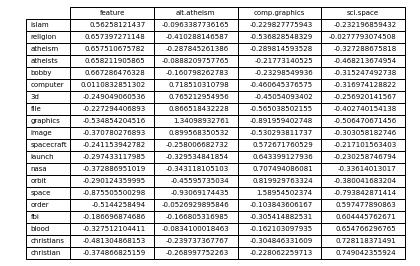

Label name-alt.atheism
Top 5 features are
in this
is not
cheers kent
you are
claim that
Label name-comp.graphics
Top 5 features are
comp graphics
is there
out there
looking for
in advance
Label name-sci.space
Top 5 features are
it was
sci space
and such
the space
the moon
Label name-talk.religion.misc
Top 5 features are
the word
the fbi
but he
cheers kent
ignorance is


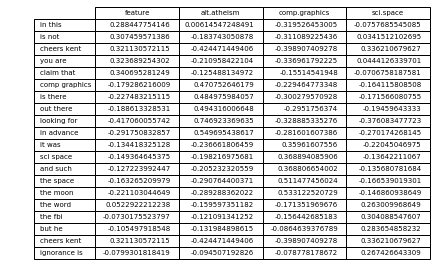

In [7]:
### P4 ###
def P4():
### STUDENT START ###
    #set classifier
    clf=LogisticRegression(C=0.25)
    #set count vector
    cv=CountVectorizer()
    # learn vocabulary
    X = cv.fit_transform(train_data)
    # learn model
    clf.fit(X, train_labels)
    # get feature names
    feature_names = cv.get_feature_names()
    ##Find the 5 largest values in each row of coef_
    sorted_words= np.argpartition(clf.coef_, -5)[:,-5:]
    
    ## Print the names of those features here for each label
    for i,j in enumerate(sorted_words):
        print("Label name-{0}".format(newsgroups_train.target_names[i]))
        print("Top 5 features are")
        for x in j:
            print(feature_names[x])
    output_table=np.take(clf.coef_, sorted_words.flatten(), axis=1)
    #print table
    fig=plt.figure()
    ax = fig.add_subplot(111)
    ax.axis('off')
    names = newsgroups_train.target_names
    colLabels=("feature", names[0], names[1], names[2], names[3])
    the_table = ax.table(cellText=output_table.T, colLabels = colLabels, rowLabels = [feature_names[i] for i in sorted_words.flatten()], loc='center')
    plt.show()
    
    ###Do same thing for bigrams
    #set classifier
    clf=LogisticRegression(C=0.25)
    #set count vector
    cv=CountVectorizer(ngram_range=(2, 3))
    # learn vocabulary
    X = cv.fit_transform(train_data)
    # learn model
    clf.fit(X, train_labels)
    # get feature names
    feature_names = cv.get_feature_names()
    ##Find the 5 largest values in each row of coef_
    sorted_words= np.argpartition(clf.coef_, -5)[:,-5:]
    
    ## Print the names of those features here for each label
    for i,j in enumerate(sorted_words):
        print("Label name-{0}".format(newsgroups_train.target_names[i]))
        print("Top 5 features are")
        for x in j:
            print(feature_names[x])
    output_table=np.take(clf.coef_, sorted_words.flatten(), axis=1)
    #print table
    fig=plt.figure()
    ax = fig.add_subplot(111)
    ax.axis('off')
    names = newsgroups_train.target_names
    colLabels=("feature", names[0], names[1], names[2], names[3])
    the_table = ax.table(cellText=output_table.T, colLabels = colLabels, rowLabels = [feature_names[i] for i in sorted_words.flatten()], loc='center')
    plt.show()   
### STUDENT END ###
P4()

# For unigrams, it is interesting that "islam" is a highly weighted feature in the alt.atheism newsgroup but not the in talk.religion.misc group. 
# Also, it is so suprising to observe that "fbi" is such a highly weighted feature in talk.religion.misc.
# For the bigrams, I'm suprised to see so many stop words included, for example, "and such", "is there", which 
# do not make a lot of sense to me. 


In [8]:
### P5 ###

def empty_preprocessor(s):
    return s

def preprocess_text(s):
    # lowercase everything
    s = s.lower()

    # replace numbers with a single '1' token
    s = re.sub(r'[0-9]+', '1', s)
    
    # de-pluralize trailing 's' characters
    s = re.sub(r's\b', '', s)
    
    # remove trailing ing from words
    s = re.sub(r'ing\b', '', s)
    
    # remove anything not alphanumeric
    s = re.sub(r'[^a-zA-Z0-9 ]', ' ', s)

   
    return s       

def better_preprocessor_cv(s):   
    # preprocess text 
    filtered_texts = [preprocess_text(text) for text in s]

    return filtered_texts
    

def regression_clf(preprocessor):
    # initiation count vector
    cv = CountVectorizer()
    X = cv.fit_transform(preprocessor(train_data))
    # initiation logic regression 
    lr = LogisticRegression(C = 1)
    lr.fit(X, train_labels)
    dev_features = cv.transform(preprocessor(dev_data))
    # Print out f1 socire and size
    print("F1-score: %0.4f" % metrics.f1_score(dev_labels, lr.predict(dev_features), average='micro'))
    print("Dictionary size", len(cv.vocabulary_))

def P5():
    print("Empty preprocessor:")
    regression_clf(lambda x: empty_preprocessor(x))
    print("\nBetter preprocessor with CV:")
    regression_clf(lambda x: better_preprocessor_cv(x))
 
P5()

Empty preprocessor:
F1-score: 0.6997
Dictionary size 26879

Better preprocessor with CV:
F1-score: 0.7115
Dictionary size 21048


Number of non-zero learned weights for L1: 1608
Number of non-zero learned weights for L2: 107516


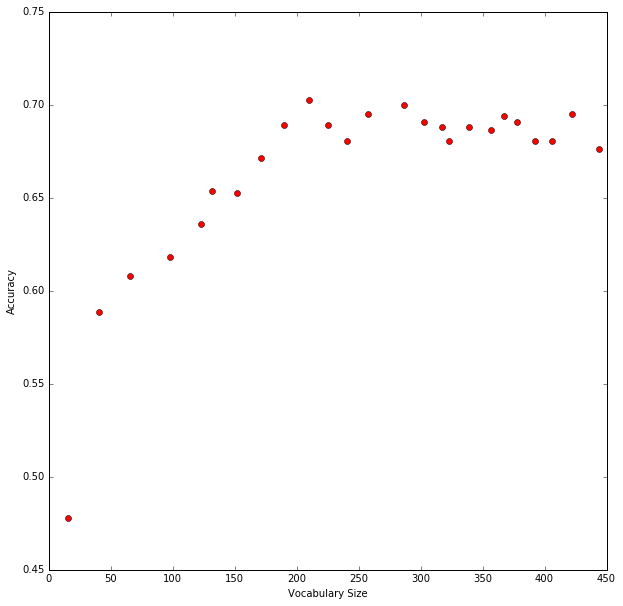

In [9]:
### P6 ###
def P6():
    ### STUDENT START ###
    clf = LogisticRegression(penalty='l1')
    cv = CountVectorizer()
    X_L1 = cv.fit_transform(train_data)
    clf.fit(X_L1, train_labels)
    coefs = clf.coef_
    nnzL1 = 0
    # Find non-zero elements for L1
    for i in range(0, len(coefs)):
        for j in range(0, len(coefs[i])):
            if coefs[i][j] != 0: 
                nnzL1 = nnzL1 + 1
                
    clf = LogisticRegression(penalty='l2')
    cv = CountVectorizer()
    X_L2 = cv.fit_transform(train_data)
    clf.fit(X_L2, train_labels)
    coefs = clf.coef_
    nnzL2 = 0
    # Find non-zero elements for L2
    for i in range(0, len(coefs)):
        for j in range(0, len(coefs[i])):
            if coefs[i][j] != 0: 
                nnzL2 = nnzL2 + 1
                
      
    print("Number of non-zero learned weights for L1: %d" %(nnzL1))
    print("Number of non-zero learned weights for L2: %d" %(nnzL2))
    
   
    #cv = CountVectorizer()
    X_dev = cv.transform(dev_data)
    X_L1 = cv.fit_transform(train_data)
    # run for 25 C values between 0.01 and 0.25
    C_values = np.linspace(0.01, 0.25, 25)
    vocab_sizes = []
    accuracies = []
    
    for C in C_values:
        clf = LogisticRegression(C = C, penalty = 'l1', tol = 0.01)
        clf.fit(X_L1, train_labels)
        # Find non-zero cases
        indices = np.sum(clf.coef_ != 0, axis = 0) > 0
        accuracy = clf.score(X_dev, dev_labels)
        
        # Saving word in vocabulary if non-zero weight
        vocab = []
        for key, value in cv.vocabulary_.items():
            if indices[value]:
                vocab.append(key)

                                   
                              
        # Find new accuracy of L2 linear regression with new vocabulary
        cv_n = CountVectorizer(vocabulary=vocab)
        X_train_n = cv_n.transform(train_data)
        X_dev_n = cv_n.transform(dev_data)
        vocab_sizes.append(X_train_n.shape[1])
        
        clf = LogisticRegression(penalty='l2', tol = 0.01)
        clf.fit(X_train_n, train_labels)
        accuracy = clf.score(X_dev_n, dev_labels)
        accuracies.append(accuracy)
    
    # Plot vocabulary size vs accuracy
    plt.figure(figsize=(10, 10))
    plt.plot(vocab_sizes, accuracies, 'ro')
    plt.xlabel('Vocabulary Size')
    plt.ylabel('Accuracy')
    print    
    ### STUDENT END ###
P6()

In [10]:
###P7###
def P7():
    tfidfv = TfidfVectorizer()
    train_features = tfidfv.fit_transform(train_data)
    dev_features = tfidfv.transform(dev_data)
    lr = LogisticRegression(C=100)
    lr.fit(train_features, train_labels)
    # Get R values for all dev data
    R_values = []
    for i in range(len(dev_labels)):
        probs = lr.predict_proba(dev_features[i])[0]
        R = max(probs) / probs[dev_labels[i]]
        R_values.append((R, i))
    # Sort them by R values    
    R_values = sorted(R_values)[::-1]
    # Selecte top 3 by R values
    top_index = list(map(lambda pair: pair[1], R_values[0:3]))
    top_R_values = list(map(lambda pair: pair[0], R_values[0:3]))
    print("The top 3 documents indices are %d, %d and %d" % tuple(top_index))
    print("their R values are %.4f %.4f %.4f" % tuple(top_R_values))
    
    for i in range(len(top_index)):
        print('\n')
        print("Document %d:" % top_index[i])
        print("Predicted class: %s" % newsgroups_train.target_names[lr.predict(dev_features[top_index[i]])])
        print("Real class: %s" % newsgroups_train.target_names[dev_labels[top_index[i]]])
        print("Text is:")
        print(dev_data[top_index[i]])
        print("-"*30)
P7()

# CountVectorizor returns a matrix of counts for a word occuring in a document. TfIdf applies the tf-idf formula to return
# a score for each word based on its importance of the word to search results. The document 665 is interesting, 
# because it mentions about computer key words with religion. The topic obviously is about religion (mormons) but 
# the abundant computer reference makes the classifier break. A possible approach to solve this would be to overweigth those words 
# that are dominant at classifying certain texts into a particular class. The idea of using an L1 regression could be utilized here.   
# By first running a regression with L2 and picking a number of key important words in the vocabulary with the heighest weigths,  
# then we can re-run the classifier with L2 penality with texts obtained from previous step. Such method
# can help us to eliminate thsoe noisy low-valued features.




The top 3 documents indices are 215, 665 and 607
their R values are 929.3586 325.0041 287.1790


Document 215:
Predicted class: comp.graphics
Real class: talk.religion.misc
Text is:
I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a simplified Joseph Smith Story,
testimonies of the three and eight witnesses, and a "Words-to-Know"
glossary.

As with the previous announcement, readers are reminded that this is a
not-for-profit endeavor. This is a copyrighted work, but people are welcome
to make *verbatim* copies for personal use. People can recuperate the
actual costs of printing (paper, copy center charges), but may not cha

C:\Users\syc\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


In [11]:
### P8 ###
# From P5, we still use F1 score and reduction of dictionary size as our measures of topic classification algorithms. 
# Here, we do two things to get improvements. 1. enhance text preprocessing by shorten words for those longer then 7 characters;
# 2. Using TFIDF as feature selection method for pre-processed texts.  
# Comparing to P5, the dictionary size getting smaller with even higher F1 score.

def preprocess_text(s):
    # lowercase everything
    s = s.lower()

    # replace numbers with a single '1' token
    s = re.sub(r'[0-9]+', '1', s)
    
    # removing trailing s characters
    s = re.sub(r's\b', '', s)
    
    # remove trailing ing from words
    s = re.sub(r'ing\b', '', s)
    
    # remove anything not alphanumeric
    s = re.sub(r'[^a-zA-Z0-9 ]', ' ', s)

    # shorten words longer than 7 characters
    s = re.sub(r'([\w]{7})[\w]+', r'\1', s)

    return s       

def better_preprocessor_cv(s):   
    # preprocess text 
    filtered_texts = [preprocess_text(text) for text in s]

    return filtered_texts
    

def better_preprocessor_tfidf(s):   
    # preprocess text 
    preproc_texts = [preprocess_text(text) for text in s]

    # use a tfidf vectorizer and remove words with document frequency less than 3
    tfdifv = TfidfVectorizer(min_df = 3)
    tf_texts = tfdifv.fit_transform(preproc_texts)
    feature_names = tfdifv.get_feature_names()
    filtered_texts = []
    for i in range(len(preproc_texts)):
        # target the 75% highest features according to the tfidf score for each document
        row = tf_texts.getrow(i)
        features = row.nonzero()[1]
        # sorted by score
        features_sorted = sorted([(row.getcol(feature).toarray()[0][0], feature) for feature in features])[::-1]
        valid_count = int(len(features_sorted) * 0.75)
        valid_features = map(lambda pair: pair[1], features_sorted[:valid_count])
        valid_words = set([feature_names[feature] for feature in valid_features])
        filtered_texts.append(' '.join([word for word in preproc_texts[i].split() if word in valid_words]))
        
    return filtered_texts

def regression_clf(preprocessor):
    # initiation count vector
    cv = CountVectorizer()
    X = cv.fit_transform(preprocessor(train_data))
    # initiation logic regression 
    lr = LogisticRegression(C = 1)
    lr.fit(X, train_labels)
    dev_features = cv.transform(preprocessor(dev_data))
    # Print out f1 socire and size
    print("F1-score: %0.4f" % metrics.f1_score(dev_labels, lr.predict(dev_features), average='micro'))
    print("Dictionary size", len(cv.vocabulary_))

def P8():
    print("\nBetter preprocessor with CV:")
    regression_clf(lambda x: better_preprocessor_cv(x))
    print("\nBetter preprocessor with TFIDF:")
    regression_clf(lambda x: better_preprocessor_tfidf(x))
    
P8()


Better preprocessor with CV:
F1-score: 0.7219
Dictionary size 18216

Better preprocessor with TFIDF:
F1-score: 0.7293
Dictionary size 6596


In [214]:
### P8 Second Approach, first step, finding train data key words weights for each topic at train data ###
# import means that C:\Users\syc\Anaconda3\Lib\site-packages has those folder and files
# If no, need to download and install to above directory
import nltk
import gensim
import stop_words
from stop_words import get_stop_words
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models, similarities
from gensim.similarities import MatrixSimilarity, SparseMatrixSimilarity, Similarity

tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = get_stop_words('en')

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

#train_data

# list for tokenized documents in loop
texts = []

# loop through train data list
for i in train_data[:200]:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)    
   

 #turn our tokenized documents into a id-term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=4, id2word = dictionary, passes=20)
print(ldamodel.print_topics(num_topics=4, num_words=3))


[(0, '0.010*probe + 0.009*orbit + 0.008*first'), (1, '0.007*space + 0.007*s + 0.006*jesu'), (2, '0.009*t + 0.008*s + 0.008*argument'), (3, '0.009*ra + 0.006*god + 0.006*space')]


In [215]:
### P8 Second Approach, first step, finding train data key words weights for each topic at test data###
# import means that C:\Users\syc\Anaconda3\Lib\site-packages has those folder and files
# If no, need to download and install to above directory
import nltk
import gensim
import stop_words
from stop_words import get_stop_words
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models, similarities
from gensim.similarities import MatrixSimilarity, SparseMatrixSimilarity, Similarity

tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = get_stop_words('en')

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()


#test_data
# list for tokenized documents in loop
texts = []

# loop through train data list
for i in test_data[:200]:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)    
   

 #turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

# generate LDA model
ldamodel_test = gensim.models.ldamodel.LdaModel(corpus, num_topics=4, id2word = dictionary, passes=20)
print(ldamodel_test.print_topics(num_topics=4, num_words=3))

# By comparing these key words, it is hard to predict test data from train data


[(0, '0.016*t + 0.011*s + 0.007*think'), (1, '0.010*will + 0.009*s + 0.008*launch'), (2, '0.011*s + 0.009*energi + 0.005*use'), (3, '0.025*jpeg + 0.018*imag + 0.015*file')]


In [234]:
### P8 Second Approach, using features to form a gemoetric space and then 
### measure similarity 
# import means that C:\Users\syc\Anaconda3\Lib\site-packages has those folder and files
# If no, need to download and install to above directory
import nltk
import gensim
import stop_words
from stop_words import get_stop_words
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models, similarities
from gensim.similarities import MatrixSimilarity, SparseMatrixSimilarity, Similarity

tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = get_stop_words('en')

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

#train_data
#test_data
# list for tokenized documents in loop
texts = []

# loop through train data list
for i in train_data[:100]:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)    
   

 #turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

# LSI model
lsi = models.LsiModel(corpus, id2word=dictionary, num_topics=4)
total_test_docs = 50
correct = 0
for j in range(total_test_docs):
    doc = test_data[j]
    vec_bow = dictionary.doc2bow(doc.lower().split())
    vec_lsi = lsi[vec_bow] # convert the query to LSI space
    index = Similarity('C:/Users/syc/Anaconda3/Lib/site-packages/gensim', corpus, num_features=50000) # if corpus has 7 documents...
    similarities = index[vec_lsi]
    # Find document index with max similarity
    idx = min(range(len(similarities)), key = lambda i: similarities[i])
    # If test document label agree with max similarity document's label
    # correct happen by LDA method
    if (test_labels[j] == train_labels[idx]):
        correct = correct + 1
    
correction_rate = correct/total_test_docs
print("Corretion rate by LDA Similarity: %.4f" % correction_rate)

# Even using this similarity approach, the correction rate by LDA is very low
# Not much difference as 25%, it requires further investigation why 
# LDA is not very good, compared to CV and TFIDF, in topic classification.
# I guess that we may have association words sets for each knolwedge domain 
# to relate those key words selected from same knowledge domain. 

Corretion rate by LDA Similarity: 0.3600
